In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

### 1. Data Cleaning

In [2]:
df_raw = pd.read_csv('../two_reactions_022624.csv')
df_raw.tail()

,Unnamed: 0,Temperature,A1,Ea1,A2,Ea2,A3,Ea3,A4,Ea4,...,cINT1_10800s,cINT1_14400s,Fast_rxn1,Medium_rxn1,Slow_rxn1,Fast_rxn2,Medium_rxn2,Slow_rxn2,Reaction_order,Mechanism
1933581,1933581,273,261.472219,194,0.044413,141,0,0,0,0,...,4.236088e-02,3.977472e-02,1,0,0,0,0,1,"{'rxn1': {'SM': 2, 'C': 2, 'B': 2, 'R': 2}, 'r...","(93, 254)"
1933582,1933582,273,596.074861,62,8.957436,9,0,0,0,0,...,9.985276e-06,7.871450e-06,1,0,0,0,1,0,"{'rxn1': {'SM': 2, 'C': 2, 'B': 2, 'R': 2}, 'r...","(93, 254)"
1933583,1933583,273,423.789150,55,904.812139,184,0,0,0,0,...,1.042629e-07,7.955867e-08,1,0,0,1,0,0,"{'rxn1': {'SM': 2, 'C': 2, 'B': 2, 'R': 2}, 'r...","(93, 254)"
1933584,1933584,273,0.014179,123,0.061371,74,0,0,0,0,...,8.618686e-03,8.963359e-03,0,0,1,0,0,1,"{'rxn1': {'SM': 2, 'C': 2, 'B': 2, 'R': 2}, 'r...","(93, 254)"
1933585,1933585,273,0.045442,179,1.544173,121,0,0,0,0,...,2.689157e-03,2.451002e-03,0,0,1,0,1,0,"{'rxn1': {'SM': 2, 'C': 2, 'B': 2, 'R': 2}, 'r...","(93, 254)"


In [3]:
df_raw.shape

(1933586, 258)

In [4]:
y_raw_df = df_raw.iloc[:, -1:]
y_raw_df.tail()

,Mechanism
1933581,"(93, 254)"
1933582,"(93, 254)"
1933583,"(93, 254)"
1933584,"(93, 254)"
1933585,"(93, 254)"


In [5]:
unique_values = y_raw_df['Mechanism'].unique()
print(len(unique_values))

456


In [6]:
df = df_raw.copy()
df.shape

(1933586, 258)

In [7]:
conc_list = [col for col in df.columns if col.endswith('s')]
# conc_list

In [8]:
x_df_raw = df[conc_list]
x_df_raw.head()

,cSM_0s,cSM_0.1s,cSM_1s,cSM_20s,cSM_40s,cSM_60s,cSM_120s,cSM_180s,cSM_240s,cSM_300s,...,cINT1_2400s,cINT1_3000s,cINT1_3600s,cINT1_4500s,cINT1_5400s,cINT1_6300s,cINT1_7200s,cINT1_9000s,cINT1_10800s,cINT1_14400s
0,0.3,0.299999,0.299992,0.299837,0.299675,0.299514,0.299035,0.298564,0.298101,0.297645,...,0.006314,0.006981,0.007418,0.007767,0.007898,0.007860,0.007791,0.007491,0.007172,0.006560
1,0.3,0.300000,0.299999,0.299978,0.299957,0.299935,0.299870,0.299805,0.299740,0.299675,...,0.000503,0.000512,0.000509,0.000498,0.000495,0.000490,0.000485,0.000474,0.000466,0.000450
2,0.3,0.300000,0.299996,0.299926,0.299853,0.299780,0.299561,0.299344,0.299129,0.298914,...,0.000119,0.000117,0.000115,0.000111,0.000108,0.000106,0.000103,0.000099,0.000095,0.000088
3,0.3,0.299989,0.299887,0.297811,0.295775,0.293877,0.288868,0.284657,0.281052,0.277897,...,0.017600,0.016738,0.015892,0.014708,0.013685,0.012807,0.012051,0.010814,0.009851,0.008435
4,0.3,0.299941,0.299417,0.290150,0.282960,0.277360,0.265672,0.257948,0.252221,0.247715,...,0.004310,0.003784,0.003389,0.002952,0.002632,0.002379,0.002182,0.001874,0.001653,0.001348


In [9]:
x_df_raw.shape

(1933586, 240)

In [10]:
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Transpose the DataFrame so that rows become columns for scaling
x_df_transposed = x_df_raw.T

# Scale the entire transposed DataFrame
scaled_data = scaler.fit_transform(x_df_transposed)

# Transpose the scaled data back to the original orientation
x = pd.DataFrame(scaled_data.T, columns=x_df_raw.columns, index=x_df_raw.index)

In [11]:
x.head()

,cSM_0s,cSM_0.1s,cSM_1s,cSM_20s,cSM_40s,cSM_60s,cSM_120s,cSM_180s,cSM_240s,cSM_300s,...,cINT1_2400s,cINT1_3000s,cINT1_3600s,cINT1_4500s,cINT1_5400s,cINT1_6300s,cINT1_7200s,cINT1_9000s,cINT1_10800s,cINT1_14400s
0,0.333333,0.333332,0.333324,0.333152,0.332972,0.332793,0.332261,0.331738,0.331224,0.330717,...,0.007016,0.007757,0.008242,0.008630,0.008775,0.008734,0.008657,0.008323,0.007969,0.007289
1,0.333333,0.333333,0.333332,0.333309,0.333285,0.333261,0.333189,0.333117,0.333045,0.332973,...,0.000559,0.000569,0.000566,0.000553,0.000549,0.000545,0.000539,0.000527,0.000517,0.000500
2,0.333333,0.333333,0.333329,0.333252,0.333170,0.333089,0.332846,0.332605,0.332365,0.332127,...,0.000133,0.000130,0.000127,0.000124,0.000120,0.000117,0.000115,0.000110,0.000105,0.000098
3,0.333333,0.333321,0.333207,0.330901,0.328639,0.326530,0.320964,0.316285,0.312280,0.308774,...,0.019555,0.018597,0.017658,0.016342,0.015205,0.014230,0.013390,0.012016,0.010945,0.009372
4,0.333333,0.333268,0.332686,0.322389,0.314400,0.308178,0.295191,0.286609,0.280245,0.275239,...,0.004789,0.004205,0.003766,0.003280,0.002925,0.002643,0.002424,0.002082,0.001837,0.001498


In [12]:
x.shape

(1933586, 240)

In [13]:
y_df = df.iloc[:, -1:]
y_df.tail()

,Mechanism
1933581,"(93, 254)"
1933582,"(93, 254)"
1933583,"(93, 254)"
1933584,"(93, 254)"
1933585,"(93, 254)"


In [14]:
# Create a copy of the original DataFrame
y_df_factorized = y_df.copy()

# Create a dictionary to store the mapping of original labels to sequential labels
mechanism_dic = {}

# Use factorize to get sequential labels
y_df_factorized['Mechanism'], unique_labels = pd.factorize(y_df_factorized['Mechanism'])

# Increment by 1 to match your requirement
y_df_factorized['Mechanism'] += 1

# Store the mapping in the dictionary
mechanism_dic = dict(zip(unique_labels, range(1, len(unique_labels) + 1)))

# Display the DataFrame with sequential labels
print(y_df_factorized)

# Display the dictionary
print(mechanism_dic)

         Mechanism
0                1
1                1
2                1
3                1
4                1
...            ...
1933581         62
1933582         62
1933583         62
1933584         62
1933585         62

[1933586 rows x 1 columns]
{'(105, 197)': 1, '(105, 228)': 2, '(105, 229)': 3, '(108, 138)': 4, '(108, 170)': 5, '(108, 192)': 6, '(108, 224)': 7, '(108, 246)': 8, '(108, 278)': 9, '(108, 300)': 10, '(108, 332)': 11, '(109, 138)': 12, '(109, 139)': 13, '(109, 170)': 14, '(109, 171)': 15, '(109, 192)': 16, '(109, 193)': 17, '(109, 224)': 18, '(109, 225)': 19, '(93, 255)': 20, '(93, 262)': 21, '(93, 263)': 22, '(93, 308)': 23, '(93, 309)': 24, '(93, 316)': 25, '(93, 317)': 26, '(97, 128)': 27, '(97, 166)': 28, '(97, 167)': 29, '(97, 181)': 30, '(97, 220)': 31, '(97, 221)': 32, '(72, 204)': 33, '(72, 205)': 34, '(72, 212)': 35, '(72, 213)': 36, '(73, 150)': 37, '(73, 151)': 38, '(73, 158)': 39, '(73, 159)': 40, '(73, 204)': 41, '(73, 205)': 42, '(73, 212)': 43, '(

In [15]:
print(len(mechanism_dic))

456


In [16]:
unique_mechanism = df['Mechanism'].unique()
print(len(unique_mechanism))

456


### 2. ML Model

#### 2.1 Split Dataset

In [17]:
x.tail()

,cSM_0s,cSM_0.1s,cSM_1s,cSM_20s,cSM_40s,cSM_60s,cSM_120s,cSM_180s,cSM_240s,cSM_300s,...,cINT1_2400s,cINT1_3000s,cINT1_3600s,cINT1_4500s,cINT1_5400s,cINT1_6300s,cINT1_7200s,cINT1_9000s,cINT1_10800s,cINT1_14400s
1933581,0.333333,0.327349,0.293590,0.202480,0.185327,0.176645,0.164088,0.158029,0.154277,0.151664,...,6.275848e-02,6.047909e-02,5.857770e-02,5.622427e-02,5.429247e-02,5.266523e-02,5.125899e-02,4.893444e-02,4.706765e-02,4.419414e-02
1933582,0.333333,0.320007,0.267789,0.181156,0.167704,0.161147,0.152048,0.147856,0.145341,0.143635,...,4.819785e-05,3.918124e-05,3.289082e-05,2.668646e-05,2.236475e-05,1.936135e-05,1.689938e-05,1.375380e-05,1.109475e-05,8.746055e-06
1933583,0.333333,0.323456,0.278272,0.188772,0.173904,0.166546,0.156165,0.151293,0.148334,0.146305,...,4.775315e-07,3.885170e-07,3.280314e-07,2.669785e-07,2.243345e-07,1.943700e-07,1.704890e-07,1.384731e-07,1.158476e-07,8.839853e-08
1933584,0.333333,0.333333,0.333330,0.333262,0.333191,0.333120,0.332907,0.332695,0.332484,0.332274,...,3.818451e-03,4.606387e-03,5.326639e-03,6.277075e-03,7.080558e-03,7.749471e-03,8.297305e-03,9.092941e-03,9.576317e-03,9.959288e-03
1933585,0.333333,0.333332,0.333322,0.333111,0.332889,0.332668,0.332013,0.331366,0.330728,0.330098,...,4.149791e-03,4.047360e-03,3.932019e-03,3.763374e-03,3.611976e-03,3.478599e-03,3.359512e-03,3.156144e-03,2.987952e-03,2.723336e-03


In [18]:
x.shape

(1933586, 240)

In [19]:
y_df_oh = pd.get_dummies(y_df, columns = ['Mechanism']) 
y_df_oh.tail()

,"Mechanism_(0, 146)","Mechanism_(0, 147)","Mechanism_(0, 154)","Mechanism_(0, 155)","Mechanism_(1, 146)","Mechanism_(1, 147)","Mechanism_(1, 154)","Mechanism_(1, 155)","Mechanism_(101, 126)","Mechanism_(101, 162)",...,"Mechanism_(97, 128)","Mechanism_(97, 166)","Mechanism_(97, 167)","Mechanism_(97, 181)","Mechanism_(97, 220)","Mechanism_(97, 221)","Mechanism_(97, 338)","Mechanism_(97, 386)","Mechanism_(97, 404)","Mechanism_(97, 452)"
1933581,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1933582,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1933583,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1933584,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1933585,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
y_df_oh.shape

(1933586, 456)

In [21]:
y = np.where(y_df_oh, 1, 0)
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
X_train_df, X_test_df, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.05, random_state=37)

In [23]:
print('training data has %d observation with %d features'% X_train_df.shape)
print('test data has %d observation with %d features'% X_test_df.shape)

training data has 1836906 observation with 240 features
test data has 96680 observation with 240 features


In [24]:
X_train_df.head()

,cSM_0s,cSM_0.1s,cSM_1s,cSM_20s,cSM_40s,cSM_60s,cSM_120s,cSM_180s,cSM_240s,cSM_300s,...,cINT1_2400s,cINT1_3000s,cINT1_3600s,cINT1_4500s,cINT1_5400s,cINT1_6300s,cINT1_7200s,cINT1_9000s,cINT1_10800s,cINT1_14400s
1459100,0.666666,0.000009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.561708,0.553785,0.547734,0.540914,0.535847,0.531923,0.528790,0.524104,0.520750,0.516260
1896046,0.833333,0.833330,0.833298,0.832626,0.831924,0.831228,0.829172,0.827164,0.825202,0.823285,...,0.000009,0.000009,0.000008,0.000008,0.000008,0.000008,0.000008,0.000007,0.000007,0.000007
968160,0.333333,0.333297,0.332970,0.326250,0.319520,0.313114,0.295610,0.280275,0.266704,0.254590,...,0.069588,0.063861,0.058443,0.051457,0.045791,0.041188,0.037404,0.031587,0.027340,0.021568
605448,0.333333,0.003058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000006,0.000006,0.000004,0.000003,0.000003,0.000003,0.000002,0.000002,0.000001,0.000001
1574931,0.666667,0.666148,0.661630,0.603996,0.578012,0.563949,0.544214,0.535572,0.530625,0.527411,...,0.065278,0.065304,0.065319,0.065338,0.065347,0.065355,0.065362,0.065369,0.065375,0.065381


In [25]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
X_train = X_train_df.to_numpy()
X_test = X_test_df.to_numpy()
X_train

array([[6.66666375e-01, 8.64659390e-06, 0.00000000e+00, ...,
        5.24103567e-01, 5.20749569e-01, 5.16260321e-01],
       [8.33333333e-01, 8.33329783e-01, 8.33297833e-01, ...,
        7.39333964e-06, 7.19593722e-06, 6.89835126e-06],
       [3.33333333e-01, 3.33296993e-01, 3.32970356e-01, ...,
        3.15867918e-02, 2.73400487e-02, 2.15682561e-02],
       ...,
       [3.33333333e-01, 3.33324903e-01, 3.33249064e-01, ...,
        8.90973969e-02, 9.32020928e-02, 9.88450912e-02],
       [3.33333333e-01, 3.33322224e-01, 3.33222288e-01, ...,
        1.10472690e-01, 1.14783402e-01, 1.20264515e-01],
       [3.33333333e-01, 3.31398102e-01, 3.18951029e-01, ...,
        7.26743944e-06, 6.06035491e-06, 4.55024782e-06]])

In [ ]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Find the indices of '1' in each row
indices_train = np.argmax(y_train, axis=1)

# Create a 1D array with values corresponding to the positions of '1'
y_train_1D = indices_train + 1  # Adding 1 to make the index 1-based

# Print the result
print(y_train_1D)

[412 245 128 ...  62 136 400]


In [ ]:
# Find the indices of '1' in each row
indices_test = np.argmax(y_test, axis=1)

# Create a 1D array with values corresponding to the positions of '1'
y_test_1D = indices_test + 1  # Adding 1 to make the index 1-based

# Print the result
print(y_test_1D)

[306 402  60 ... 131 132 154]


#### 2.2 Train RF Model

In [ ]:
classifier_RF = RandomForestClassifier(n_estimators=120)

In [ ]:
classifier_RF.fit(X_train, y_train_1D)

RandomForestClassifier(n_estimators=120)

In [ ]:
classifier_RF.score(X_train,y_train_1D)

0.9996352562406569

In [ ]:
RF_predict_1D = classifier_RF.predict(X_test)

In [ ]:
classifier_RF.score(X_test,y_test_1D)

0.5236346710798511

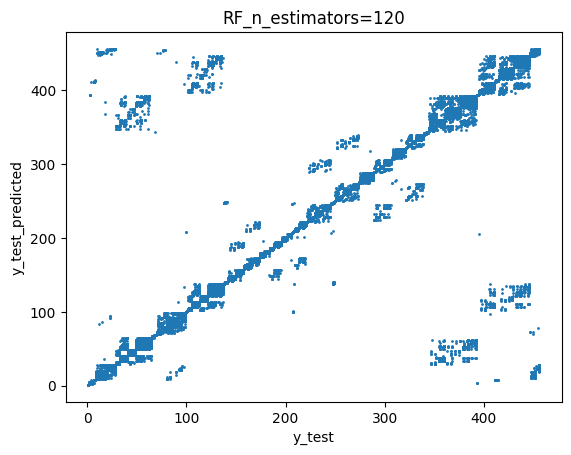

In [ ]:
# Plotting the data
plt.scatter(y_test_1D, RF_predict_1D, marker='o', s = 1, label='Data Points')

# Adding labels and title
plt.xlabel('y_test')
plt.ylabel('y_test_predicted')
plt.title('RF_n_estimators=120')

# # Adding a legend
# plt.legend()

# Display the plot
plt.show()

In [ ]:
joblib.dump(classifier_RF, 'Step 3_RF_model_conc_normalized_n_estimators=120.joblib', compress=9)

['Step 3_RF_model_conc_normalized_n_estimators=120.joblib']

In [ ]:
def generate_predicted_grouping(predictions):
    threshold = 1.0
    index = np.argsort(predictions) + 1
    prob = 0
    grouping = []
    probabilities = []
    for j in index[::-1]:
        prob += predictions[j - 1]
        grouping.append(j)
        probabilities.append(predictions[j - 1])
        if prob >= threshold:
            break
    # print(grouping)
    # print(probabilities)
    return grouping, probabilities

In [ ]:
y_predicted_proba = classifier_RF.predict_proba(X_test)
print(y_predicted_proba)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
cnt = 0
total_iterations = len(y_predicted_proba)
for idx_proba, i in enumerate(y_predicted_proba):
    # print(idx_proba)
    grouping, probabilities = generate_predicted_grouping(i)
    if y_test_1D[idx_proba] in grouping:
        cnt += 1

percentage = (cnt / total_iterations) * 100
print("Percentage:", percentage)

Percentage: 99.66177079023582


In [ ]:
model = joblib.load("Step 3_RF_model_conc_normalized_n_estimators=120.joblib")

In [ ]:
RF_predict_1D = model.predict(X_test)

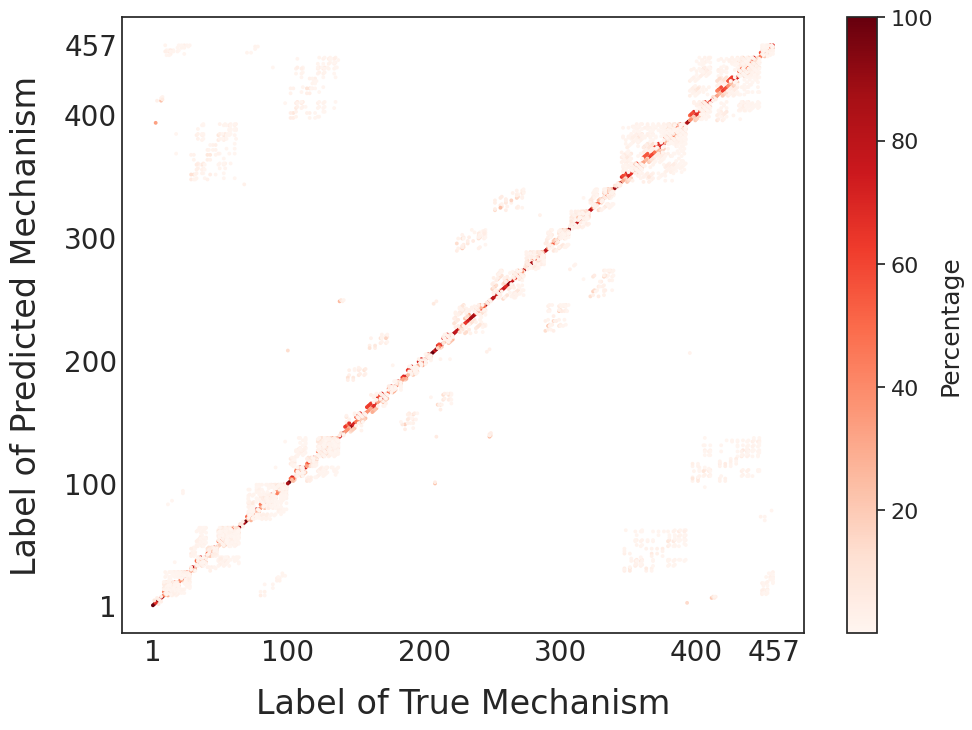

In [ ]:
# Calculate the percentage of correct predictions for each unique pair of true and predicted values
count_dict = {} 
for true_val, pred_val in zip(y_test_1D, RF_predict_1D):
    if (true_val, pred_val) not in count_dict:
        count_dict[(true_val, pred_val)] = 1
    else:
        count_dict[(true_val, pred_val)] += 1
# print(count_dict)

# Calculate total counts for each value starting from 1 to 456 for key[0]
total_counts = {}
for i in range(1, 457):
    total_counts[i] = sum(value for key, value in count_dict.items() if key[0] == i)
# print(total_counts)


# Calculate percentages
percentages = {}
for key, value in count_dict.items():
    # print(key)
    # print(value)
    percentages[key] = (value / total_counts[key[0]]) * 100
# print(percentages)

# Extract x and y data for the scatter plot
x_data = [key[0] for key in percentages]
y_data = [key[1] for key in percentages]
colors = [value for value in percentages.values()]

plt.figure(figsize=(11, 8))  # Adjust width and height as needed

# Create the scatter plot
# plt.scatter(x_data, y_data, c=colors, cmap='viridis', s = 1)
plt.scatter(x_data, y_data, c=colors, cmap='Reds', s = 3) #, zorder=1)


# Adding labels and title
plt.xlabel('Label of True Mechanism', fontsize = 24, labelpad=15)
plt.ylabel('Label of Predicted Mechanism', fontsize = 24, labelpad=15)
# plt.title('Scatter Plot')

# Add color bar
cbar = plt.colorbar(ticks=[0, 20, 40, 60, 80, 100])
cbar.set_label('Percentage', fontsize=18)  # Adjust the fontsize and labelpad as needed
# Set font size of ticks in color bar
cbar.ax.tick_params(labelsize=16)  # Adjust the font size as needed

# Add axis ticks
plt.xticks([1, 100, 200, 300, 400, 457], fontsize = 20)  # Adjust the range and step size for x-axis ticks
plt.yticks([1, 100, 200, 300, 400, 457], fontsize = 20)  # Adjust the range and step size for x-axis ticks
plt.tick_params(axis='both', direction='in')  # Set ticks to be inside the plot


plt.show()
